In [367]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Data = pd.read_csv('seed.txt',header=None, sep="\s+", usecols=[2, 6, 7], names=['x', 'y', 'label'])

In [368]:
Data = Data[Data.label != 3]
Data['label'].replace({1: 0.,2: 1.}, inplace=True)


In [369]:
class PreprocessData:
    def NomalizeData(Data):
        lenght = len(Data)
        normalizedData = []
        for i in range (lenght):
            normalizedData.append(float((Data[i] - min(Data) ) / ( max(Data) - min(Data)) ))
            
        return normalizedData
    
    def TestAndTrain(Data , PercentageOfTrainData):
        PercentageOfTrainData = float(PercentageOfTrainData / 100)
        Train_DataFrame = Data.sample(frac=PercentageOfTrainData)
        Test_DataFrame =Data.drop(Train_DataFrame.index)
        
        return Train_DataFrame , Test_DataFrame

In [370]:
#devide data to test and train 
Dataset = PreprocessData.TestAndTrain(Data , 70)

TrainData = Dataset[0]
TestData = Dataset[1]
X = TrainData[['x' , 'y']].to_numpy()
Xnonbias = X
X= np.c_[np.ones((len(X) , 1)) , X]
Y = TrainData['label'].to_numpy()

xtest =  TestData[['x' , 'y']].to_numpy()
ytest =  TestData['label'].to_numpy()

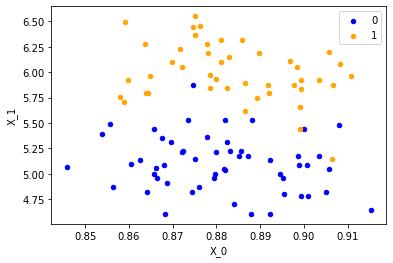

In [371]:
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = TrainData.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()


In [372]:
#defining functions 
def sigmoid(z):
    return 1.0/(1+ np.exp(-1*z))

def hypotesis( X , theta):
    z = np.dot(X , theta)
    yHat = sigmoid(z)
    return yHat
def error(X , theta , y ):
    yHat = hypotesis(X , theta)
    err = np.dot(-y , np.log(yHat)) - np.dot((1-y) , np.log(1-yHat))
    return err/len(X)
def gradiant(X , theta , y ):
    yHat = hypotesis(X , theta)
    gradiant = np.dot(X.T , yHat - y)
    return gradiant/len(X)
def gradiant_descent(X,y,alpha=0.02 , epochs= 20000):
    m , n = X.shape
    theta = np.zeros((n,))
    err_list = []
    for i in range(epochs):
        err = error(X , theta , y)
        err_list.append(err)
        grad = gradiant(X , theta , y)
        theta -= alpha *grad
    return theta , err_list
def plot_decision_boundary(X, w, b , y):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    x1 = np.array(x1)
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
   
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
   
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    


In [373]:
theta , err_list = gradiant_descent(X , Y)


In [374]:
w=[0,0]
w[0] = theta[1]
w[1] = theta[2]
b = theta[0]


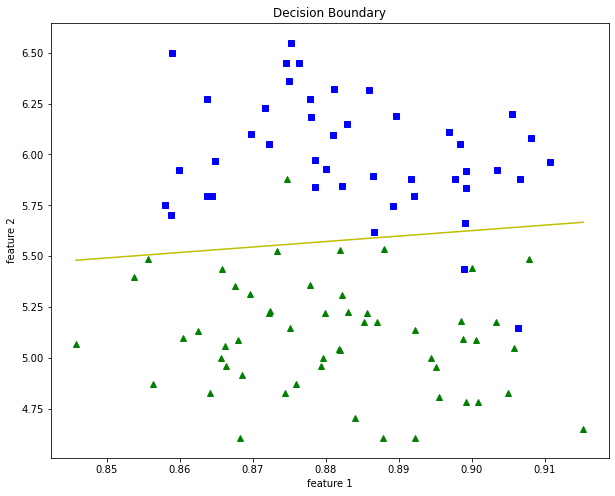

In [375]:
preds = sigmoid(np.dot(X, theta) + b)
pred_class = []
pred_class = [1 if i > 0.5 else 0 for i in preds]
plot_decision_boundary( Xnonbias, w , b,Y)


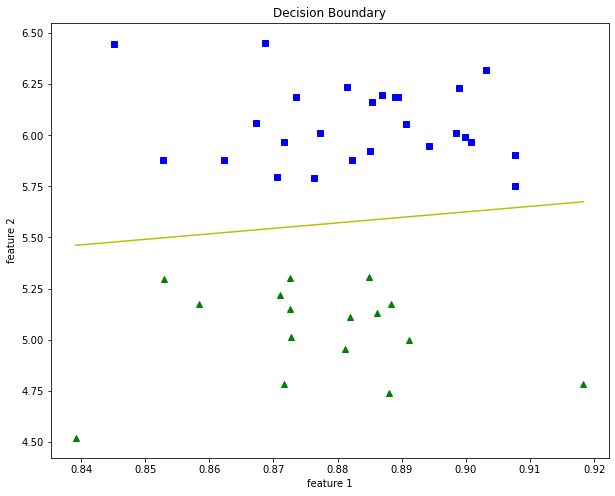

In [377]:
plot_decision_boundary( xtest, w , b,ytest)

In [379]:
errorTrain = error(Xnonbias , w , Y)
errorTst = error(xtest , w , ytest)


In [380]:
print (errorTrain)
print (errorTst)

4.096102341135135
2.7813457976497045
